# Análise Gráfica

Criando gráficos a partir de biliotecas tais como MatplotLib no Python

Importando biblioteca para realizar gráficos 3D

O Matplotlib foi inicialmente projetado com apenas plotagem bidimensional em mente. Na época do lançamento 1.0, alguns utilitários de plotagem tridimensionais foram construídos em cima da exibição bidimensional do Matplotlib, e o resultado é um conjunto de ferramentas conveniente (embora um pouco limitado) para visualização tridimensional de dados. plotagens tridimensionais são ativadas importando o kit de ferramentas mplot3d, incluído na instalação principal do Matplotlib:

In [1]:
from mpl_toolkits import mplot3d

Uma vez que este submódulo é importado, um eixo tridimensional pode ser criado passando a palavra-chave projeção = '3D' para qualquer uma das rotinas normais de criação de eixos:

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

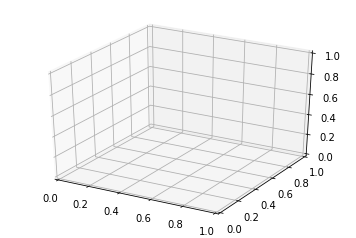

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')

Com esses eixos tridimensionais habilitados, agora podemos plotar uma variedade de tipos de plotagem tridimensionais. A plotagem tridimensional é uma das funcionalidades que se beneficiam imensamente da visualização de figuras de forma interativa, em vez de estaticamente no notebook; Lembre-se de que, para usar figuras interativas, você pode usar ``%matplotlib notebook`` em vez de ``%matplotlib inline`` ao executar este código.

O gráfico tridimensional mais básico é uma linha ou coleção de gráficos de dispersão criados a partir de conjuntos de trilogramas (x, y, z). 
Em analogia com os gráficos bidimensionais mais comuns discutidos anteriormente, eles podem ser criados usando as funções ax.plot3D e ax.scatter3D.
A assinatura de chamadas para estas é quase idêntica à de suas contrapartes bidimensionais, portanto, você pode consultar Gráficos de Linha Simples e Gráficos de Dispersão Simples para obter mais informações sobre o controle da saída. 
Aqui nós plotaremos uma espiral trigonométrica, junto com alguns pontos desenhados aleatoriamente perto da linha:

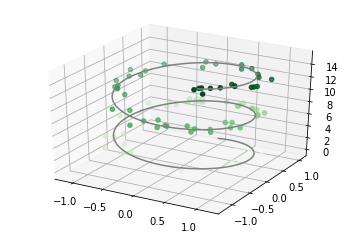

In [4]:
ax = plt.axes(projection='3d')

# Dados para uma linha tridimensional 
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Dados para pontos próximos a linha tridimensional 
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

## Gráficos de contorno 3D

Criando gráficos de contorno 3D a partir de uma função sinusoidal 

In [5]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

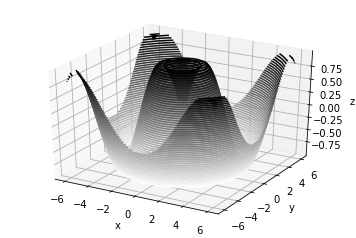

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

Modificando o ponto de vista/azimute com o comando ax.view_init(x,y)


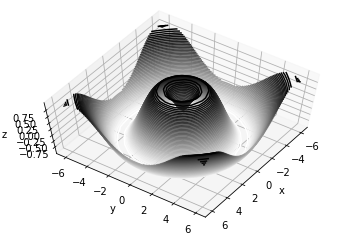

In [7]:
ax.view_init(65, 35)
fig

## Wireframes e gráficos de superfície

Criando um gráfico de wireframe

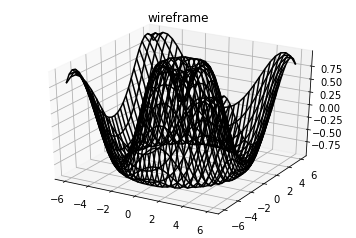

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

Um gráfico de superfície é como um gráfico de wireframe, mas cada face do wireframe é um polígono preenchido. Adicionar um mapa de cores aos polígonos preenchidos pode ajudar na percepção da topologia da superfície que está sendo visualizada:

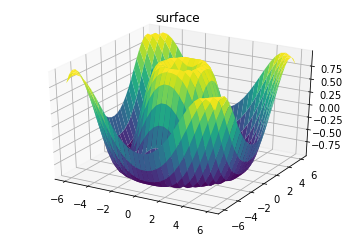

In [9]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

Observe que, embora a grade de valores para um gráfico de superfície precise ser bidimensional, ela não precisa ser retilínea. Aqui está um exemplo de criação de uma grade polar parcial, que quando usada com o gráfico surface3D pode nos dar uma fatia da função que estamos visualizando:

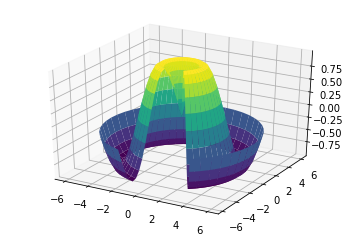

In [10]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');

## Superfícies por triangulaçãoSurface Triangulations

Para algumas aplicações, as redes uniformemente amostradas requeridas pelas rotinas acima são excessivamente restritivas e inconvenientes.
Nestas situações, os gráficos baseados em triangulação podem ser muito úteis.
E se, em vez de um empate par de uma grade cartesiana ou polar, em vez disso, temos um conjunto de sorteios aleatórios?

In [11]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

Poderíamos criar um gráfico de dispersão dos pontos para ter uma ideia da superfície da qual estamos amostrando:

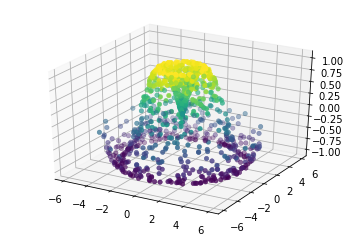

In [12]:
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

Isso deixa muito a desejar.
A função que nos ajudará nesse caso é o `` ax.plot_trisurf``, que cria uma superfície primeiro encontrando um conjunto de triângulos formado entre pontos adjacentes (lembre-se de que x, y e z aqui são matrizes unidimensionais):

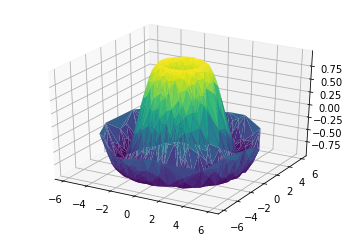

In [13]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none');

### Visualizando uma tira de Möbius

Uma tira de Möbius é semelhante a uma tira de papel colada em um laço com meia torção. Topologicamente, é bem interessante porque, apesar das aparências, tem apenas um lado! Aqui vamos visualizar um objeto usando as ferramentas tridimensionais do Matplotlib. A chave para criar a faixa de Möbius é pensar na sua parametrização: é uma tira bidimensional, então precisamos de duas dimensões intrínsecas. Vamos chamá-los de $\theta$, que varia de $0$ a $2\pi$ ao redor do loop, e ww que varia de -1 a 1 ao longo da largura da faixa:


In [14]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

Agora, a partir dessa parametrização, devemos determinar as posições (x, y, z) da faixa incorporada.

Pensando nisso, podemos perceber que há duas rotações acontecendo: uma é a posição do loop em torno de seu centro (o que chamamos de $\theta$), enquanto a outra é a torção da faixa em torno de seu eixo (vamos chamar isso $\phi$). Para uma tira de Möbius, devemos ter a tira fazendo meia torção durante um loop completo, ou $\Delta\phi = \Delta\theta/2$.


In [15]:
phi = 0.5 * theta

Agora usamos nossa lembrança da trigonometria para derivar a incorporação tridimensional. Vamos definir rr, a distância de cada ponto do centro, e usar isso para encontrar as coordenadas incorporadas (x, y, z) (x, y, z):
Agora, a partir dessa parametrização, devemos determinar as posições $(x, y, z)$ da faixa incorporada.


In [16]:
# raio em um plano x-y 
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

Finalmente, para traçar o objeto, devemos nos certificar de que a triangulação está correta. A melhor maneira de fazer isso é definir a triangulação * dentro da parametrização subjacente *, e então deixar o Matplotlib projetar essa triangulação no espaço tridimensional da faixa de Möbius.
Isso pode ser feito da seguinte maneira:

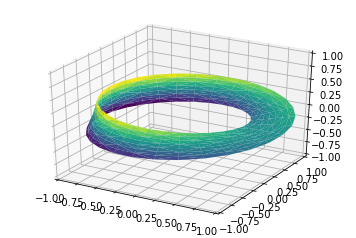

In [17]:
# triangular na parametrização subjacente

from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='viridis', linewidths=0.2);

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);

Combinando todas essas técnicas, é possível criar e exibir uma ampla variedade de objetos e padrões tridimensionais no Matplotlib.



Por ``Jake VanderPlas`` e Cláudio Pinheiro